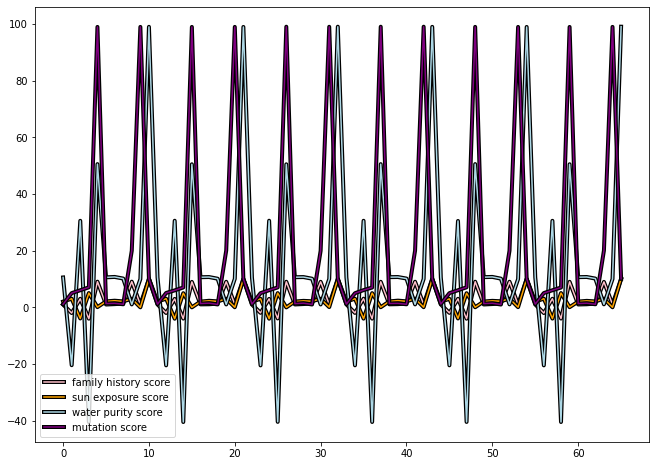

In [ ]:
mult = 6
training_set_proportion = 0.1
knn_n_neighbors = 3 # try setting this to 2
kmeans_n_clusters = 5 # try setting this to 7
xlims = [-50, 50]
ylims = [-50, 50]
type_vector = ('y', 'g', 'b', 'c', 'm','y','y','y','k','r','y')
n_types = len(type_vector)

import random
random.seed(123)

epsilon = 0.1

def add(a,b):
  return a + b

x = list(map(add,mult * [1,-2,3,-4,9,1.01,1.1,1.3,9,1,10], [random.random() * epsilon for i in range(0,mult * n_types)]))
y = list(map(add,mult * [2.01,3,-4,5,0,2.02,2.3,2.1,3,0,10], [random.random() * epsilon for i in range(0,mult * n_types)]))
z = list(map(add,mult * [10.5,-20.5,30.5,-40.5,50.5,10.6,10.7,10.1,1,10,99], [random.random() * epsilon for i in range(0,mult * n_types)]))
w = list(map(add,mult * [1.1,5,6,7,99,1.3,1.4,1.01,20,99,10], [random.random() * epsilon for i in range(0,mult * n_types)]))

assert(len(x) == mult * n_types)
assert(len(y) == mult * n_types)
assert(len(z) == mult * n_types)
assert(len(w) == mult * n_types)

import matplotlib.pyplot as plt
import matplotlib.patheffects as pe

plt.figure(figsize=(11, 8))
plt.plot(x,c="pink",label="family history score",path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
plt.plot(y,c="orange",label="sun exposure score",path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
plt.plot(z,c="lightblue",label="water purity score",path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
plt.plot(w,c="purple",label="mutation score",path_effects=[pe.Stroke(linewidth=4, foreground='k'), pe.Normal()])
plt.legend()
plt.show()

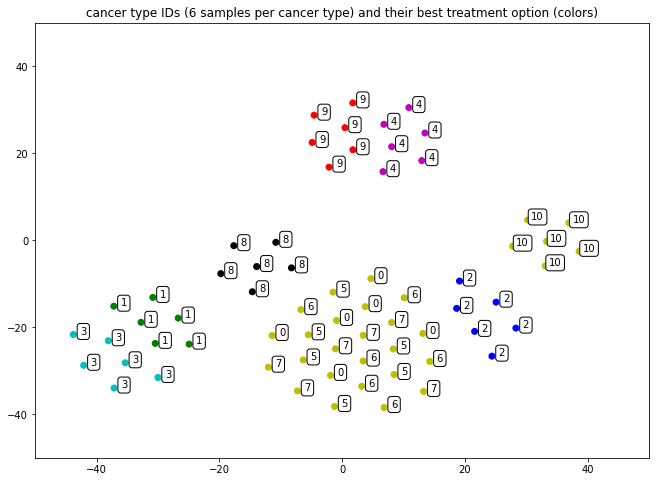

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

X = np.asarray([x,y,z,w])
X = np.transpose(X)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

plt.figure(figsize=(11, 8))
colors =  mult * type_vector
plt.scatter(X_2d[:,0],X_2d[:,1],c=colors)

for sample_idx in range(0,mult * n_types):
    sample = f'{sample_idx % n_types}'

    plt.annotate(sample,  # this is the text (put lab here to use tlab as string)
                 (X_2d[sample_idx,0], X_2d[sample_idx,1]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(10, 0),  # distance from text to points (x,y)
                 ha='center',
                 bbox=dict(boxstyle="round,pad=0.3",fc="white"))

plt.title(f'cancer type IDs ({mult} samples per cancer type) and their best treatment option (colors)')
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()



In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

km_result = KMeans(n_clusters=kmeans_n_clusters).fit(X)
km_centers_2d = tsne.fit_transform(km_result.cluster_centers_)
db_result = DBSCAN().fit(X)

from prettytable import PrettyTable
table = PrettyTable()
table.add_column("sample #",range(0,mult * n_types))
table.add_column("cancer type ID",[j%n_types for j in range(0,mult * n_types)])
table.add_column("x",x)
table.add_column("y",y)
table.add_column("z",z)
table.add_column("w",w)
table.add_column("k-means cluster label",km_result.labels_)
table.add_column("DBSCAN cluster label",db_result.labels_)
table.add_column("actual best treatment option",colors)
print(table.get_string(sortby="actual best treatment option"))



+----------+----------------+---------------------+-----------------------+---------------------+--------------------+-----------------------+----------------------+------------------------------+
| sample # | cancer type ID |          x          |           y           |          z          |         w          | k-means cluster label | DBSCAN cluster label | actual best treatment option |
+----------+----------------+---------------------+-----------------------+---------------------+--------------------+-----------------------+----------------------+------------------------------+
|    2     |       2        |  3.0407241763670396 |   -3.909084672436322  |  30.56688343543645  | 6.050047479767709  |           0           |          2           |              b               |
|    13    |       2        |  3.0001670553579225 |  -3.9955870143993555  |  30.589343356020887 | 6.0051603917672995 |           0           |          2           |              b               |
|    24    |   

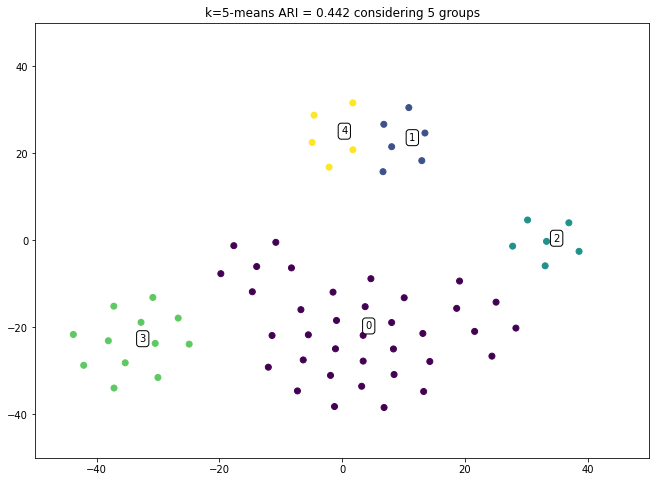

In [ ]:
from sklearn.metrics import adjusted_rand_score

fig1_title = f'k={kmeans_n_clusters}-means ARI = {round(adjusted_rand_score(colors,km_result.labels_),3)} considering {kmeans_n_clusters} groups'
plt.figure(1,figsize=(11, 8))
plt.scatter(X_2d[:,0],X_2d[:,1],c=km_result.labels_)
plt.title(fig1_title)

for cluster_label in range(len(set(km_result.labels_))):
  points_with_cluster_label = X_2d[km_result.labels_ == cluster_label,:]
  centroid_of_cluster_label = np.mean(points_with_cluster_label, axis=0) 
  #print(centroid_of_cluster_label)
  plt.annotate(f'{cluster_label}',
               (centroid_of_cluster_label[0],centroid_of_cluster_label[1]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(10, 0),  # distance from text to points (x,y)
                 ha='center',
                 bbox=dict(boxstyle="round,pad=0.3",fc="white"))
  
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()


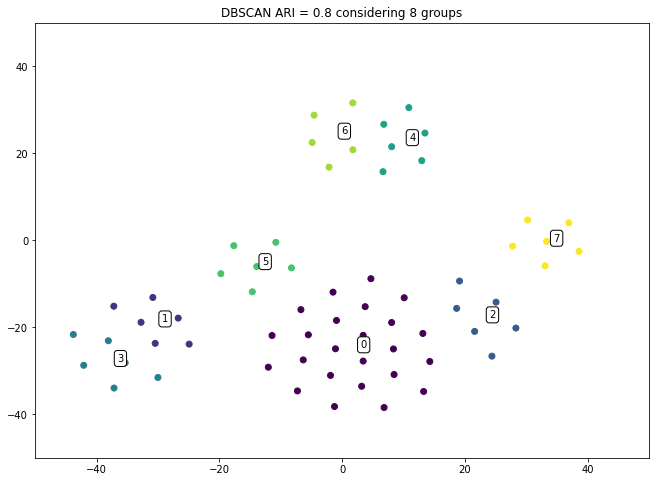

In [ ]:
fig2_title = f'DBSCAN ARI = {round(adjusted_rand_score(colors,db_result.labels_),3)} considering {len(set(db_result.labels_))} groups'
plt.figure(2,figsize=(11, 8))
plt.scatter(X_2d[:,0],X_2d[:,1],c=db_result.labels_)
plt.title(fig2_title)

for cluster_label in range(len(set(db_result.labels_))):
  points_with_cluster_label = X_2d[db_result.labels_ == cluster_label,:]
  centroid_of_cluster_label = np.mean(points_with_cluster_label, axis=0) 
  #print(centroid_of_cluster_label)
  plt.annotate(f'{cluster_label}',
               (centroid_of_cluster_label[0],centroid_of_cluster_label[1]),  # this is the point to label
                 textcoords="offset points",  # how to position the text
                 xytext=(10, 0),  # distance from text to points (x,y)
                 ha='center',
                 bbox=dict(boxstyle="round,pad=0.3",fc="white"))
  
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
shuffled_idxs = list(range(len(colors)))
random.shuffle(shuffled_idxs)

import math

n_training_set = math.floor(len(shuffled_idxs) * training_set_proportion)

print(f'n_training_set = {n_training_set}')

training_idxs = shuffled_idxs[0:n_training_set]

print(f'training_idxs = {training_idxs}')

training_features = X[training_idxs,:]
training_labels = list(colors[i] for i in training_idxs)
testing_idxs = shuffled_idxs[n_training_set:]

print(f'testing_idxs = {testing_idxs}')

testing_features = X[testing_idxs,:]
testing_labels = list(colors[i] for i in testing_idxs)

assert(n_training_set == len(training_labels))
assert(n_training_set == len(shuffled_idxs) - len(testing_labels))




n_training_set = 6
training_idxs = [30, 42, 18, 44, 21, 47]
testing_idxs = [16, 23, 45, 37, 11, 58, 14, 19, 54, 61, 38, 24, 46, 1, 49, 55, 10, 20, 57, 48, 0, 56, 32, 60, 29, 50, 2, 15, 13, 53, 8, 31, 9, 22, 52, 43, 41, 27, 63, 3, 7, 65, 26, 25, 40, 4, 62, 12, 51, 17, 35, 34, 39, 64, 6, 5, 33, 36, 28, 59]


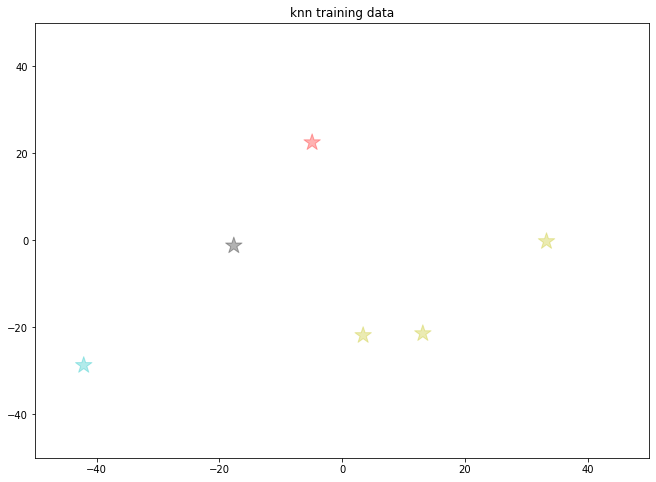

In [ ]:
fig3_title = f'knn training data'
plt.figure(3,figsize=(11, 8))
plt.scatter(X_2d[training_idxs,0],X_2d[training_idxs,1],c=training_labels,marker="*",s=300,alpha=0.3)
plt.title(fig3_title)
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()

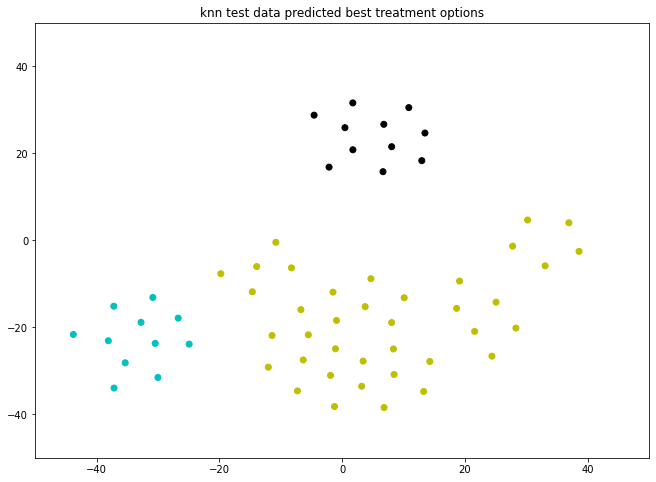

In [ ]:
knn = KNeighborsClassifier(n_neighbors=knn_n_neighbors)
knn.fit(training_features,training_labels)
knn_result = knn.predict(testing_features)

fig4_title = f'knn test data predicted best treatment options'
plt.figure(4,figsize=(11, 8))
plt.scatter(X_2d[testing_idxs,0],X_2d[testing_idxs,1],c=knn_result)
plt.title(fig4_title)
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()

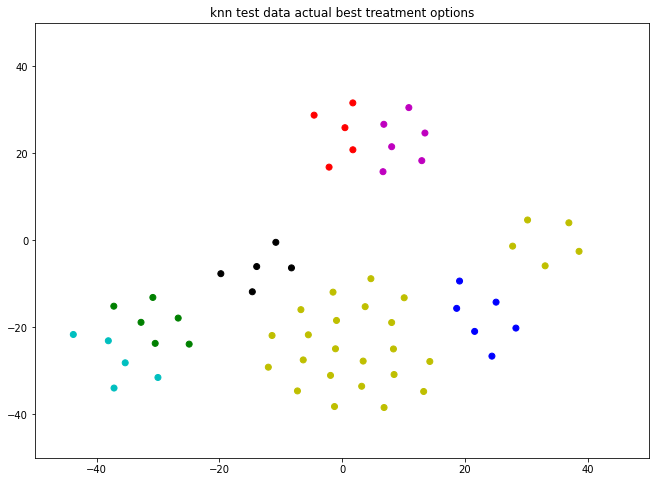

In [ ]:
fig5_title = f'knn test data actual best treatment options'
plt.figure(5,figsize=(11, 8))
plt.scatter(X_2d[testing_idxs,0],X_2d[testing_idxs,1],c=testing_labels)
plt.title(fig5_title)
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()

In [ ]:
print(f'knn test accuracy = {round(sum(knn_result == testing_labels) / len(testing_labels) * 100,2)}%')

knn test accuracy = 53.33%


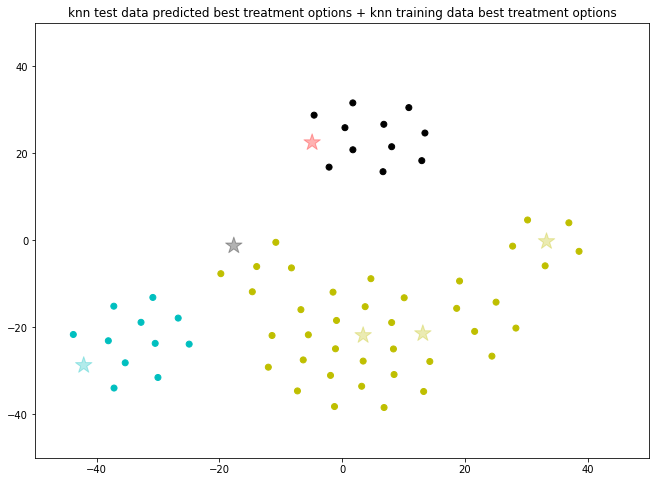

In [ ]:
fig6_title = f'knn test data predicted best treatment options + knn training data best treatment options'
plt.figure(6,figsize=(11, 8))
plt.scatter(X_2d[testing_idxs,0],X_2d[testing_idxs,1],c=knn_result)
plt.scatter(X_2d[training_idxs,0],X_2d[training_idxs,1],c=training_labels,marker="*",s=300,alpha=0.3)
plt.title(fig6_title)
plt.xlim(xlims)
plt.ylim(ylims)
plt.show()